# Assignment 7

#### Problem 2

I took a photo of some random images in my laboratory. The image was taken by a microscope (The photo is taken by a cellphone of course). Although I have absolutely no idea what it was, the image showed some regularly positioned dots, as we will see below. But first we need to import the functions in python to view the image. Here I followed the example in "2Dfft.ipynb".

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# This is to enable linting, making sure we write our python code in style.
%load_ext pycodestyle_magic
%pycodestyle_on

In [4]:
from PIL import Image, ImageOps

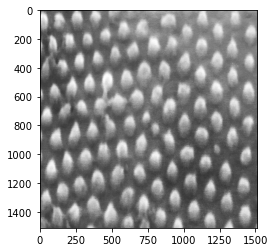

In [5]:
dots = np.array(ImageOps.grayscale(Image.open('IMG2.png')))
plt.imshow(dots, "gray")

As can seen, we have some more or less regularly positioned dots. It would be interesting to know what they are, but for now, I'll take this as my periodic pattern. We will do a 2D Fourier transform of this image.

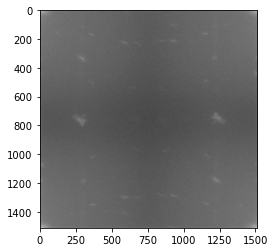

In [6]:
Fdots = np.fft.fft2(dots)
Fdotscenter = np.fft.fftshift(Fdots)
plt.imshow(np.log(1+np.abs(Fdots)), "gray")

There are some bright spots in the fourier transformed image. The bright spots arrayed themselves in a rectangular fashion, and this reflects the symmetry of our original image, where the dots are arranged in a rectangular fashion too.

Next, just for fun, we will make a low-pass filter, and see if we can filter out these regular dots.

In [7]:
# I have to make sure the grid size matches the pixel size of my original image
# So N = 1512
N = 1512

# In order to smoothed out the regular dots
# We need to block out a lot of the area in the fourier transformed image
# I played with the size of linspace too
# Turns out we need a really big linspace
# Then our hole in the middle, which is the lowpass filter can be very small

x = np.linspace(-100, 100, N)
y = np.linspace(-100, 100, N)

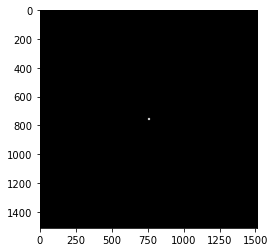

In [72]:
# R is the radius of the hole
R = 1
xx, yy = np.meshgrid(x, y, sparse=True)
lowpass = (np.sqrt(xx**2 + yy**2) <= R)*1
plt.imshow(lowpass, "gray")

There is a really tiny hole in the middle. This is our low-pass filter. In the Fourier-transformed image, only the area within that little dot will be kept. Turns out we really need to block out a big area to smooth out the dots.

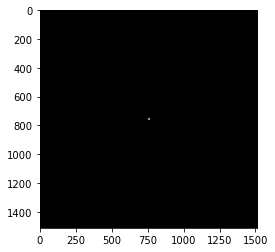

In [55]:
plt.imshow(np.log(1+np.abs(lowpass*Fdotscenter)), "gray")

In [56]:
filtered = np.fft.ifft2(lowpass*Fdotscenter)

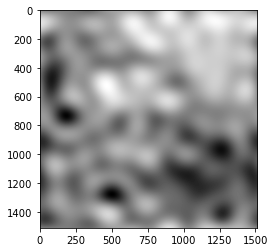

In [57]:
plt.imshow(np.log(1+np.abs(filtered)), "gray")

This filtered image looks very disturbing, it reminds of creatures from horror movies. But at least the dots are gone.

---
Just to illustrate why we need such a small hole, here I will make the hole just a little bit bigger, and rename this filter lowpass2. Let's see what happens.

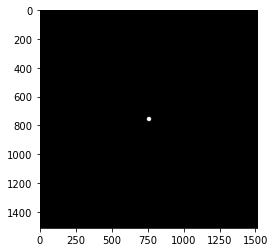

In [68]:
R2 = 2
xx2, yy2 = np.meshgrid(x, y, sparse=True)
lowpass2 = (np.sqrt(xx2**2 + yy2**2) <= R2)*1
plt.imshow(lowpass2, "gray")

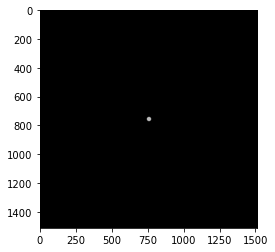

In [69]:
plt.imshow(np.log(1+np.abs(lowpass2*Fdotscenter)), "gray")

In [70]:
filtered2 = np.fft.ifft2(lowpass2*Fdotscenter)

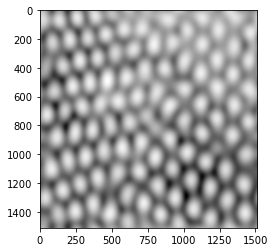

In [71]:
plt.imshow(np.log(1+np.abs(filtered2)), "gray")

The dots returned! Although they're significantly blurred out. Again, it is a disturbing image to look at, it triggers Trypophobia. Sorry!